In [1]:
source("~/common//scripts/loadCommonPackagesR.r")
library(rjson)

In [2]:
setwd("/NAS392047/projects/yujw/2021.05.21.dingsheng/2Cell.induce/")

In [3]:
readComputeMatrixResult<-function(dfPath,offset=6){
  library(rjson)
  library(tidyverse)
  
  df<-read_tsv(file=dfPath,col_names=F,col_types=cols(),skip=1)
  metadata<-readLines(gzfile(dfPath),1)%>%str_remove("^@")%>%fromJSON(json_str=.)
  dfSplited<-list()
  for(i in 1:length(metadata$sample_labels)){
    dfSplited<-c(
      dfSplited,
      df[
        (offset+1  +  metadata$sample_boundaries[i]):
        (offset  +  metadata$sample_boundaries[i+1])
      ]%>%list
    )
  }
  names(dfSplited)<-metadata$sample_labels
  return(dfSplited)
}

In [20]:
dfList<-readComputeMatrixResult("computeMatrix/allStageMERVL.matrix.gz")

In [21]:
dfList<-lapply(dfList,function(df){
  df[is.na(df)]<-0
  df%>%t%>%rowMeans(na.rm=TRUE)
})

In [22]:
plotDF<-dfList%>%as.data.frame%>%mutate(relativeCoordinate=row_number())%>%pivot_longer(cols = !relativeCoordinate,names_to = "condition",values_to = "signal")%>%mutate(condition=condition%>%str_remove("X"),condition=factor(condition,ordered = TRUE))

In [23]:
plotDF%>%head

relativeCoordinate,condition,signal
<int>,<ord>,<dbl>
1,mESC,1.444390
1,TLC,1.598896
1,2Cell_Early,1.718317
1,2Cell,1.902683
1,4Cell,1.542805
1,8Cell,1.783806


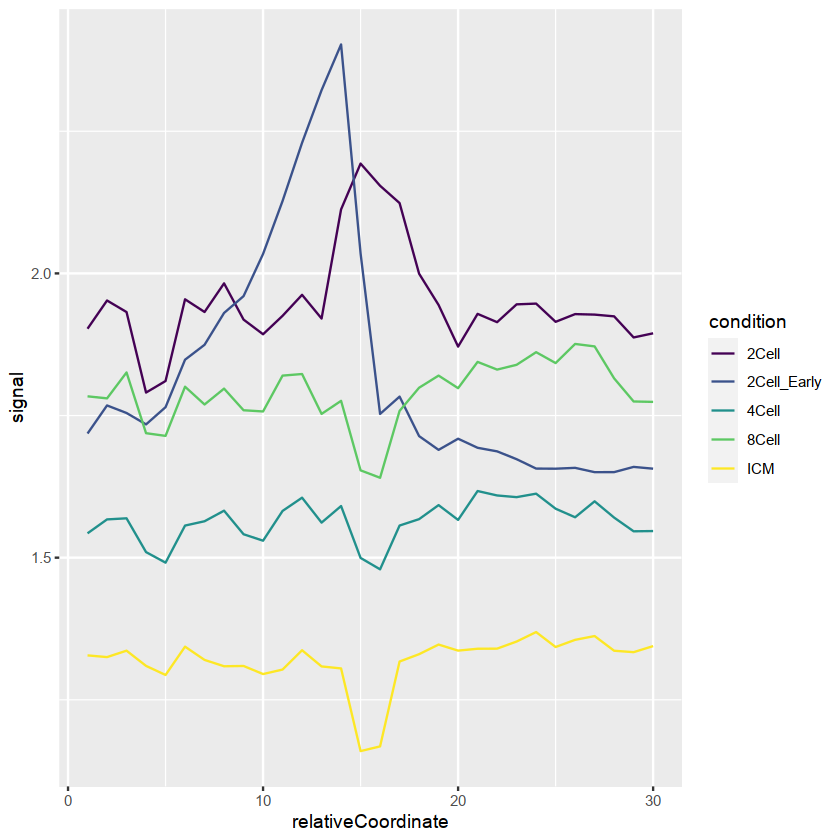

In [24]:
ggplot(plotDF%>%filter(!condition %in%c("TLC","mESC")))+
geom_line(aes(x=relativeCoordinate,y=signal,color=condition))